# <font color=#00FFFF> Remove text from the meme 
# <font color=#00FF00>Generate image caption

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Colab Notebooks'
print(path)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pip install keras_ocr

# !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
# !unzip A3DS.zip

!pip install transformers

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import cv2
import math
import numpy as np
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## <font color=#00FFFF>Load meme

In [19]:
img_file_name='98752.png' # Change this name file
img = keras_ocr.tools.read(os.path.join(path,img_file_name))
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])

1/1 [==============================] - 1s 745ms/step


# <font color=#00FFFF>Print meme with annotation and boxes

<Axes: >

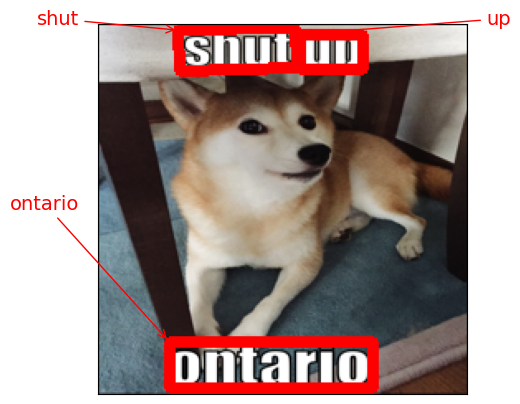

In [20]:
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

# <font color=#00FFFF>Impaint text on meme

In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
    
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)



Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 1s 1s/step


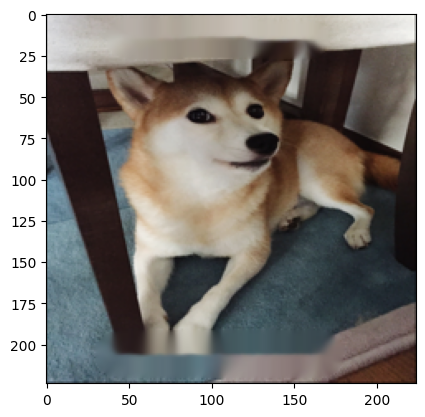

In [21]:
img_path=os.path.join(path,img_file_name)
img = inpaint_text(img_path, pipeline)
plt.imshow(img)

# <font color=#00FFFF>Image_captioning

In [ ]:
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import keras
import torch
from PIL import Image
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
def show_n_generate(img, greedy = True, model = model_raw):
    #image = Image.open(requests.get(url, stream =True).raw)
  
    img=np.array(img)
    if img.shape==(224,224,4):
        img=img[:,:,0:3]
    
    image = keras.utils.array_to_img(img)

    pixel_values = image_processor(image, return_tensors ="pt").pixel_values
    # plt.imshow(np.asarray(image))
    # plt.show()

    if greedy:
        generated_ids  = model.generate(pixel_values, max_new_tokens = 30)
    else:
        generated_ids  = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens = 30,
            top_k=5)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return generated_text

In [26]:
text=show_n_generate(img, greedy = False)
print(text)

a small brown dog laying under a wooden table 
